In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [57]:
# Example with different standard deviations
std_devs = [0.5, 1, 2]
mean = 0

for std_dev in std_devs:
    data = np.random.normal(mean, std_dev, 100000)
#     print(np.std(data))
#     plt.hist(data, bins=30, density=True, alpha=0.6, color='b')

#     xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = (1/(np.sqrt(2*np.pi)*std_dev)) * np.exp(-(x-mean)**2/(2*std_dev**2))
#     plt.plot(x, p, 'k', linewidth=2)
    
    title = f"Fit results: mean = {mean},  std dev = {std_dev}"
#     plt.title(title)
#     plt.show()

In [58]:
k = 10
std_dev = 1
epsilon = 0
N = 2000

In [59]:
q_stars = []
for i in range(k):
    q_stars.append(np.random.random()*4 - 2)

In [60]:
q_stars

[-1.829241088989352,
 0.5547890687420374,
 1.1891834891012976,
 -0.6523464961568974,
 0.20553508994996506,
 -0.8606389331253839,
 1.8706455545145366,
 -1.0404010353307402,
 0.03657651732127354,
 -0.38495994303837433]

In [61]:
games = np.zeros((k, N))
games

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [62]:
for i in range(k):
    q_star = q_stars[i]
    games[i] = np.random.normal(q_star, std_dev, N)
games

array([[-4.11520923e-01, -8.85831824e-01, -1.35791835e+00, ...,
        -1.43491972e+00, -2.16478344e+00, -2.10517031e+00],
       [-5.85797247e-01, -8.31212123e-01, -7.68803421e-01, ...,
         1.73717025e+00,  1.17881379e+00, -2.53782451e-01],
       [ 2.75501640e-01,  1.43986204e+00,  3.40417655e+00, ...,
         1.24381289e+00,  8.06251210e-01,  1.02712281e+00],
       ...,
       [ 8.19291568e-01, -1.65727237e+00, -4.28842025e-01, ...,
        -1.02650819e+00, -1.43325567e-01, -3.31321212e+00],
       [ 4.34461510e-01,  2.31499332e-01,  1.10767236e+00, ...,
         5.89704502e-01, -9.14868565e-01, -2.00515181e+00],
       [-2.03455336e-01,  2.23697021e-01, -1.10808367e+00, ...,
        -5.13232966e-01,  3.01576196e-03, -7.12970484e-01]])

In [63]:
def run(eps):
    reward = np.zeros((N))
    Q_t = [0,]*k
    freq = [0,]*k
    index = np.zeros(N)
    for i in range(k):
        A = i
        index[i] = A
        R = games[i][A]
        reward[i] = reward[i-1] + R
        Q_t[A] = R
        freq[A] = 1
#     print(Q_t)
    for i in range(k, N):
        if np.random.random() > eps:
            A = Q_t.index(max(Q_t))
    #         print(A)
            R = games[A][i]
            reward[i] = reward[i-1] + R
            freq[A] += 1
            Q_t[A] += (1/freq[A])*(R - Q_t[A])
        else:
            A = math.floor(np.random.random()*10)
    #         print(A)
            R = games[A][i]
            reward[i] = reward[i-1] + R
            freq[A] += 1
            Q_t[A] += (1/freq[A])*(R - Q_t[A])
        index[i] = A
    return(reward)

In [64]:
optimal = (np.arange(N)+1)*max(q_stars)
optimal

array([1.87064555e+00, 3.74129111e+00, 5.61193666e+00, ...,
       3.73754982e+03, 3.73942046e+03, 3.74129111e+03])

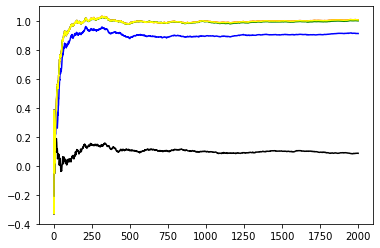

In [65]:
plt.plot(np.arange(N), run(0)/optimal, color='r')
plt.plot(np.arange(N), run(0.01)/optimal, color='g')
plt.plot(np.arange(N), run(0.1)/optimal, color='b')
plt.plot(np.arange(N), run(0.9)/optimal, color='black')
plt.plot(np.arange(N), run(0.001)/optimal, color='yellow')
plt.show()

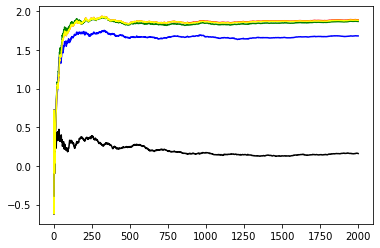

In [66]:
plt.plot(np.arange(N), run(0)/(np.arange(N)+1), color='r')
plt.plot(np.arange(N), run(0.01)/(np.arange(N)+1), color='g')
plt.plot(np.arange(N), run(0.1)/(np.arange(N)+1), color='b')
plt.plot(np.arange(N), run(0.9)/(np.arange(N)+1), color='black')
plt.plot(np.arange(N), run(0.001)/(np.arange(N)+1), color='yellow')
plt.show()